## Assignment Math589B
### Saheed Adisa Ganiyu

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def vec_Pnorm(x, p=2):
    """
    This function computes the p_norm of a vector: 1<=p<=\infty
    
    INPUT:
        
        - `x` vector
        
        - `p` - the type of norm to be computed.
        If `p` is omited, it will be computed. because, it has a default value as 2
        
    OUTPUT:
            -It returns a scalar value.
    """
    if p == float("inf"):
        return max(abs(x))
    x = np.array(x)
    res = (np.sum(x**p)**(1/p))
    return res

### 17. Problems and exercises
2. Consider a function $V_2(x, y)=(x+3)^2+y^2 \mathrm{e}^{-2 x}$. Find the minimum of (a) $V_2(x, y)$ and (b) $W_2(x, z):=V_2(x, y=z / 20)$ by the gradient descent method, starting from $(x, y)=(0,1)$ or $(x, z)=$ $(0,20)$. (c) The part (b) can be considered as an application of the steepest descent method to $V_2$. What norm $\|\Delta \boldsymbol{x}\|$ is used?
3. Consider a function $(x-5)^2+y^2+100 /\left(1+\exp \left(10 y+2 x^2-50\right)\right)$. Find its minimum (i.e., position of the minimum and the minimal value) by the gradient descent method, starting from $(x, y)=$ $(-10,0)$.

In [3]:
# 17.2(a)  Grdient Descent Metthod with Backtracking
alpha = 0.1
t = 1
beta = 0.5
x = np.array([0,1])
X = x
v2 = lambda x1,x2: (x1+3)**2 + x2**2*np.exp(-2*x1) #define function v2
dv2 = lambda x1,x2 : 2*np.array([x1-x2**2*np.exp(-2*x1)+3, x2*np.exp(-2*x1)]) #define gradient of v2
counter = 0
while (vec_Pnorm(dv2(x[0],x[1])))>= 1e-8: # Stoping criterial
    # Picking direction: gradient descent
    dx = -t*dv2(x[0],x[1])
    # Line search : backtracking
    while v2(x[0]+dx[0], x[1]+dx[1])>= (v2(x[0],x[1])+alpha*np.matmul(dv2(x[0],x[1]),dx)):
        dx =dx*beta
    # Update x
    x = x + dx
    X=np.append(X,x)
    counter +=1
print("x_min =",x,"\t", "v2(x_min) =",v2(x[0],x[1]),"\t no_iter =",counter) 

x_min = [-3.  0.] 	 v2(x_min) = 0.0 	 no_iter = 2


**Result:** We have minimum value = 0 at minimum point = (-3, 0) with 2 steps.

<IPython.core.display.Javascript object>


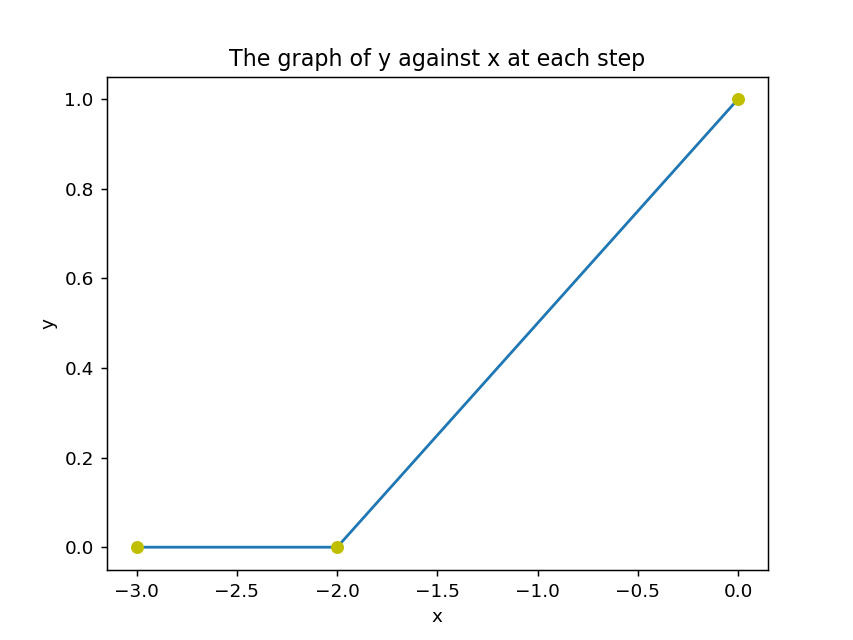

/tmp/ipykernel_5803/3612019377.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(xx, yy, 'bo', color='y')


In [5]:
%matplotlib notebook
nn = len(X)
xx = np.array([X[i] for i in range(nn) if i%2==0])
yy = np.array([X[i] for i in range(nn) if i%2!=0])
plt.plot(xx,yy)
plt.plot(xx, yy, 'bo', color='y')
plt.title("The graph of y against x at each step")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**Observation:** We observe that by fixing our $\beta=0.5$ gives more accurate result and very fast convergence as its number of steps is just 2. But by changing it($\beta$) from $0.5$ always leads to very large steps for it to be convereged. 

In [6]:
# 17.2(b)
alpha = 0.1
t = 1
beta = 0.5
x = np.array([0,20])
X = x
w2 = lambda x1,x2: (x1+3)**2 + (x2**2*np.exp(-2*x1))/400 #define function w2
dw2 = lambda x1,x2 : np.array([2*(x1+3)-(x2**2*np.exp(-2*x1))/200, x2*np.exp(-2*x1)/200]) #define gradient of w2
counter = 0
while (vec_Pnorm(dw2(x[0],x[1])))>= 1e-8: # Stoping criterial
    # Picking direction: gradient descent
    dx = -t*dw2(x[0],x[1])
    # Line search : backtracking
    while w2(x[0]+dx[0], x[1]+dx[1])>= (w2(x[0],x[1])+alpha*t*np.matmul(dw2(x[0],x[1]),dx)):
        dx =dx*beta
    # Update x
    x = x + dx
    X=np.append(X,x)
    counter +=1
print("x_min =",x,"\t", "w2(x_min) =",w2(x[0],x[1]),"\t no_iter =",counter) 

x_min = [-3.00000000e+00  1.65719453e-10] 	 w2(x_min) = 2.769834903015951e-20 	 no_iter = 193


**Observation:** By changing of variable of y to $z/20$ in question 17.2(a) with the same parameters used, we observe that there is a negligible difference in its outcome compare to question 17.2(a) own. Also, the number of steps requires is smaller to the case of 17.2(a) if $\beta$ is changed from $0.5$.

<IPython.core.display.Javascript object>


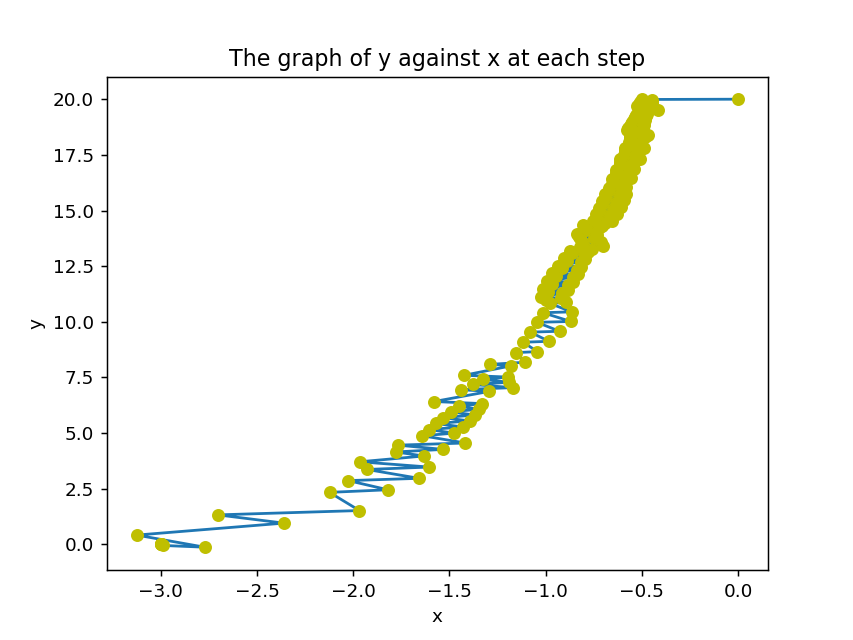

/tmp/ipykernel_5803/3612019377.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(xx, yy, 'bo', color='y')


In [7]:
%matplotlib notebook
nn = len(X)
xx = np.array([X[i] for i in range(nn) if i%2==0])
yy = np.array([X[i] for i in range(nn) if i%2!=0])
plt.plot(xx,yy)
plt.plot(xx, yy, 'bo', color='y')
plt.title("The graph of y against x at each step")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [6]:
import numpy as np
# 17.3
alpha = 0.
t = 0.2
beta = 0.5
x = np.array([-10,0])
X = x
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (x1-5)**2 +x2**2 + (100/(1+np.exp(10*x2+2*x1**2-50)))
def df(x):
    x1 = x[0]
    x2 = x[1]
    fac1 = x1-5
    fac2 = np.exp(10*x2+2*x1**2-50)
    dfx = 2*fac1 - ((400*x1*fac2)/(1+fac2)**2)
    dfy = 2*x2 - ((1000*fac2)/(1+fac2)**2)
    return np.array([dfx,dfy])
counter = 0
stop = 1000
while (((vec_Pnorm(df(x)))>= 1e-8) and counter < stop): # Stoping criterial
    # Picking direction: gradient descent
    dx = -t*df(x)
    # Line search : backtracking
    while f(x+dx)>= (f(x)+alpha*np.inner(dx,df(x))):
        dx =dx*beta
        if (np.linalg.norm(dx) < 1e-16): 
            quit()
        #print(counter)
    # Update x
    #t =0.9*vec_Pnorm(df(x))
    x = x + dx
    X=np.append(X,x)
    counter +=1
print("x_min =",x,"\t", "f(x_min) =",f(x),"\t no_iter =",counter)

x_min = [5.32000223 0.15037692] 	 f(x_min) = 0.15509908005033632 	 no_iter = 108


/tmp/ipykernel_6274/1578482011.py:11: RuntimeWarning: overflow encountered in exp
  return (x1-5)**2 +x2**2 + (100/(1+np.exp(10*x2+2*x1**2-50)))


**Observation:** We have our minimum value = 0.15509908005033632 at point = (5.32000223, 0.15037692). We observe that the loop terminated by the number of iteration fixed. The loop seems not ending with norm of the gradient alone but, there is no a noticeable difference in its outcome after some number of iteration before the iteration complete.

4.0